# Linear Regression

Linear regression is a predictive modeling technique for predicting a numeric response variable based on one or more explanatory variables. The term "regression" in predictive modeling generally refers to any modeling task that involves predicting a real number (as opposed classification, which involves predicting a category or class.). The term "linear" in the name linear regression refers to the fact that the method models data with linear combination of the explanatory variables. A linear combination is an expression where one or more variables are scaled by a constant factor and added together. In the case of linear regression with a single explanatory variable, the linear combination used in linear regression can be expressed as:

response = intercept + constant ∗ explanatory

The right side if the equation defines a line with a certain y-intercept and slope times the explanatory variable. In other words, linear regression in its most basic form fits a straight line to the response variable. The model is designed to fit a line that minimizes the squared differences (also called errors or residuals.). We won't go into all the math behind how the model actually minimizes the squared errors, but the end result is a line intended to give the "best fit" to the data. Since linear regression fits data with a line, it is most effective in cases where the response and explanatory variable have a linear relationship.

Let's take the mtcars data set and use linear regression to predict vehicle gas mileage based on vehicle weight. First, let's load some libraries and look at a scatterplot of weight and mpg to get a sense of the shape of the data:

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [5]:
# Load mtcars data set
mtcars = pd.read_csv(r"data/mtcars.csv")

mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


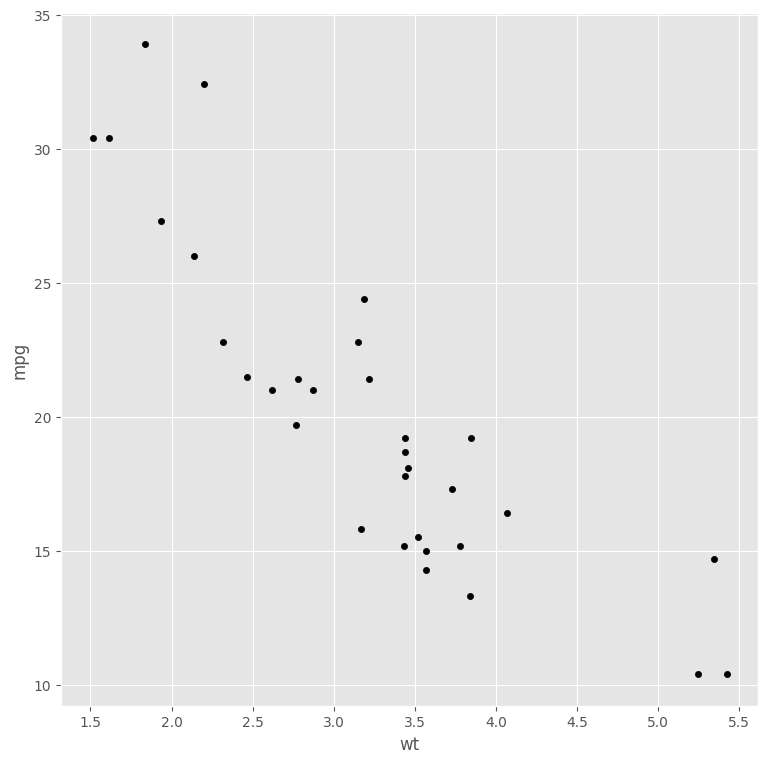

In [6]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

The scatterplot shows a roughly linear relationship between weight and mpg, suggesting a linear regression model might work well.

Python's scikit-learn library contains a wide range of functions for predictive modeling. Let's load its linear regression training function and fit a line to the mtcars data:


In [7]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to 37.2851 and the coefficient for the weight variable is -5.3445. In other words, the model fit the line: mpg = 37.2851 - 5.3445 * wt.

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:


In [8]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]),
                       y = mtcars["mpg"])

0.7528327936582646

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:


In [9]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction
print(residuals)
residuals.describe()

0    -2.282611
1    -0.919770
2    -2.085952
3     1.297350
4    -0.200144
5    -0.693255
6    -3.905363
7     4.163738
8     2.349959
9     0.299856
10   -1.100144
11    0.866873
12   -0.050247
13   -1.883024
14    1.173350
15    2.103288
16    5.981074
17    6.872711
18    1.746195
19    6.421979
20   -2.611004
21   -2.972586
22   -3.726866
23   -3.462355
24    2.464367
25    0.356426
26    0.152043
27    1.201059
28   -4.543151
29   -2.780940
30   -3.205363
31   -1.027495
Name: mpg, dtype: float64


count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:

In [10]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

np.float64(0.7528327936582646)

Now that we have a linear model, let's plot the line it fits on our scatterplot to get a sense of how well it fits the data:

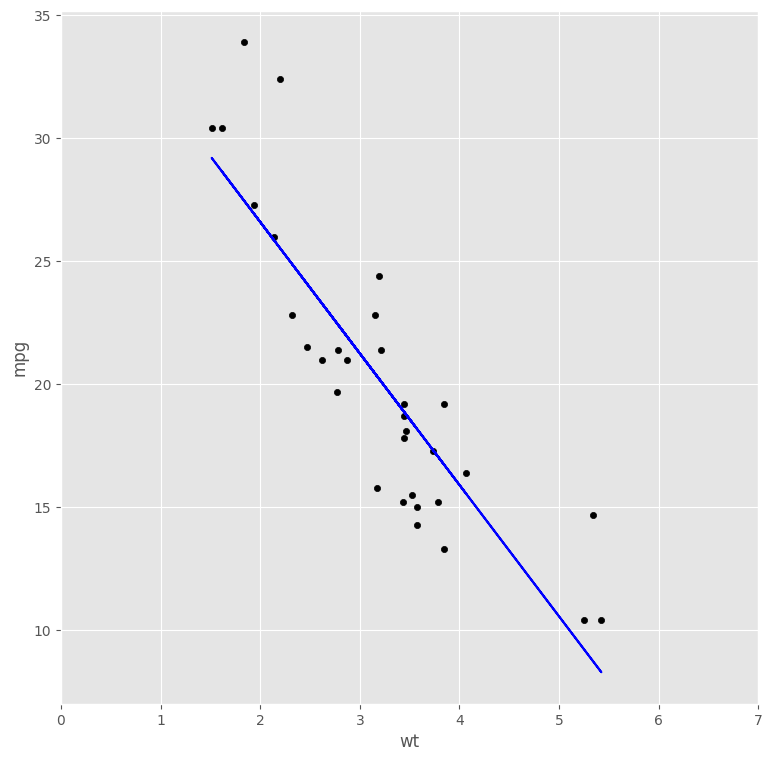

In [11]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

The regression line looks like a reasonable fit and it follows our intuition: as car weight increases we would expect fuel economy to decline.

Outliers can have a large influence on linear regression models: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. Plotting the result helps us detect influential outliers. In this case there does not appear to be any influential outliers. Let's add an outlier--a super heavy fuel efficient car--and plot a new regression model:


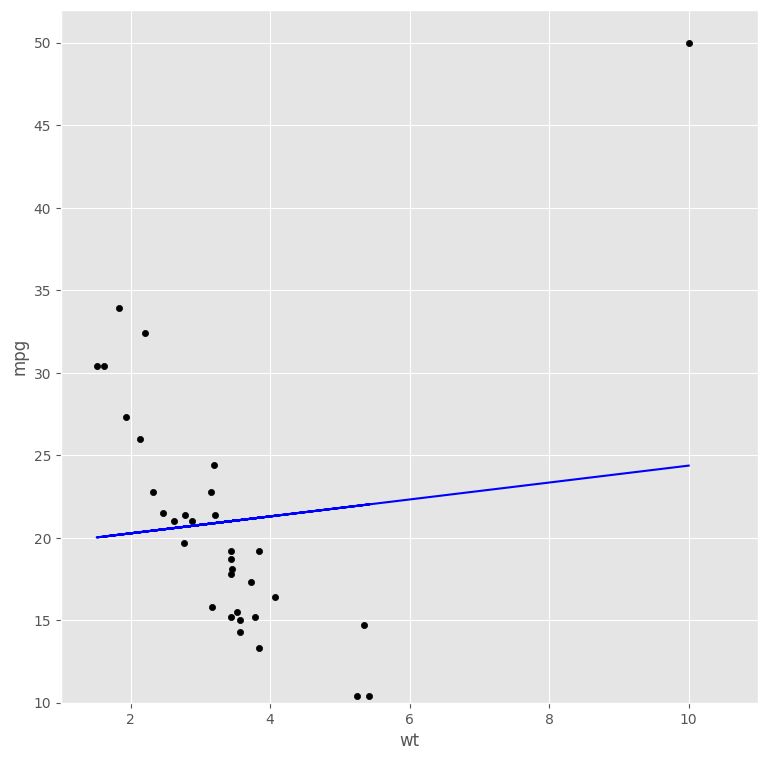

In [12]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = pd.concat([mtcars_subset,super_car])

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]),
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

Although this is an extreme, contrived case, the plot above illustrates how much influence a single outlier can have on a linear regression model.

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:


**Analyzing Residual Normality with a Q-Q Plot**

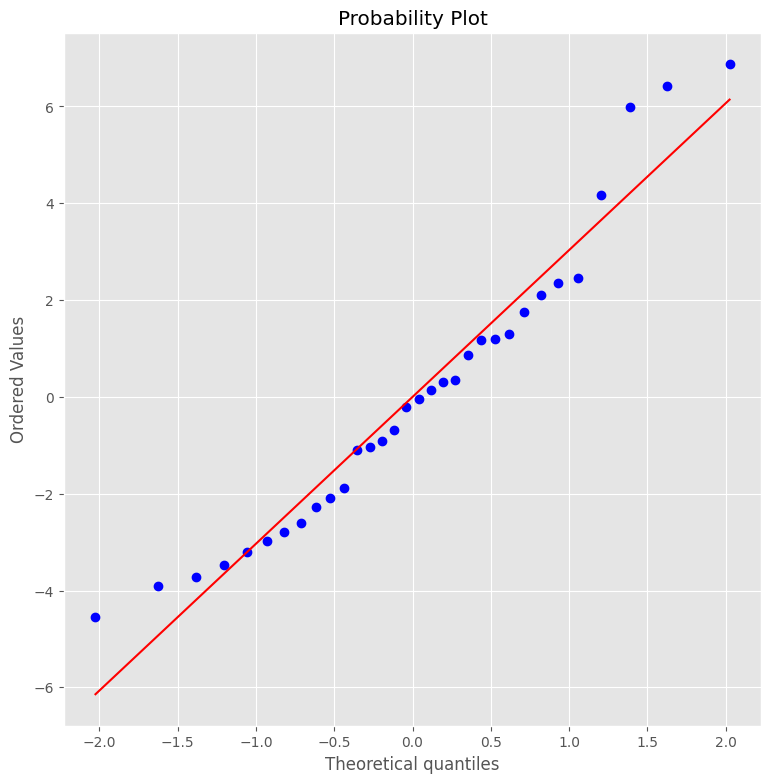

In [13]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

After making model predictions, it is useful to have some sort of metric to evaluate how well the model performed. Adjusted R-squared is one useful measure, but it only applies to the regression model itself: we'd like some universal evaluation metric that lets us compare the performance of different types of models. Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. Root mean squared error is square root of the average of the squared error (residuals.).


In [14]:
RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

np.float64(2.949162685955028)